In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [2]:
Fraud=pd.read_csv('D:\\Decision Tree assign 14\\Fraud_check.csv')
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
Fraud=pd.get_dummies(Fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [4]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
Fraud["TaxInc"] = pd.cut(Fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [5]:
print(Fraud)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

In [6]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
Fraud = pd.get_dummies(Fraud,columns = ["TaxInc"],drop_first=True)

In [7]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
# Normalized data frame (considering the numerical part of data)
Fraud_norm = norm_func(Fraud.iloc[:,1:])

In [9]:
# Declaring features & target
X = Fraud.drop(['TaxInc_Good'], axis=1)
y = Fraud['TaxInc_Good']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
##Converting the Taxable income variable to bucketing. 
Fraud["income"]="<=30000"
Fraud.loc[Fraud["Taxable.Income"]>=30000,"income"]="Good"
Fraud.loc[Fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [13]:
##Droping the Taxable income variable
Fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [14]:
Fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","Taxable.Income":"income","City.Population":"population","Work.Experience":"experience","Urban":"urban"})

,population,experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good,income
0,50047,10,0,0,1,1,1,Good
1,134075,18,1,0,0,1,1,Good
2,160205,30,0,1,0,1,1,Good
3,193264,15,1,0,1,1,1,Good
4,27533,28,0,1,0,0,1,Good
...,...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1,Good
596,55369,2,1,0,0,1,1,Good
597,154058,0,0,0,0,1,1,Good
598,180083,17,1,1,0,0,1,Good


In [15]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in Fraud.columns:
    if Fraud[column_name].dtype == object:
        Fraud[column_name] = le.fit_transform(Fraud[column_name])
    else:
        pass

In [16]:
##Splitting the data into featuers and labels
features = Fraud.iloc[:,0:5]
labels = Fraud.iloc[:,5]

In [17]:
## Collecting the column names
colnames = list(Fraud.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [19]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [20]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

2

In [21]:
model.n_outputs_

1

In [22]:
model.oob_score_
###74.7833%

0.475

In [23]:
##Predictions on train data
prediction = model.predict(x_train)

In [24]:
##Accuracy
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
##98.33%

In [25]:
np.mean(prediction == y_train)
##98.33%

0.9895833333333334

In [26]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [27]:
##Prediction on test data
pred_test = model.predict(x_test)

In [28]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)
##78.333%

In [ ]:
!pip install pydotplus

In [29]:
## In random forest we can plot a Decision tree present in Random forest
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [30]:
tree = model.estimators_[5]

In [31]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity=False)

In [32]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Building Decision Tree Classifier using Entropy Criteria

In [33]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [34]:
from sklearn import tree

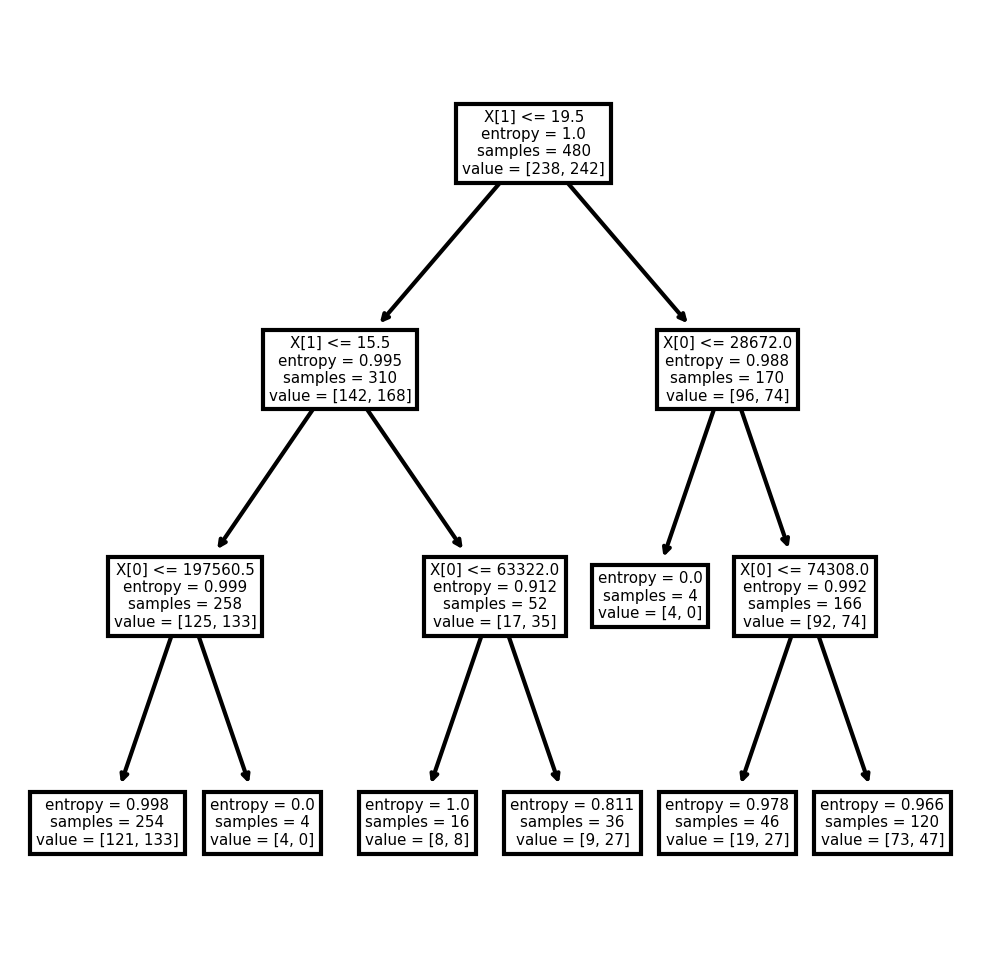

In [35]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#PLot the decision tree
tree.plot_tree(model);

In [36]:
colnames = list(Fraud.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good',
 'income']

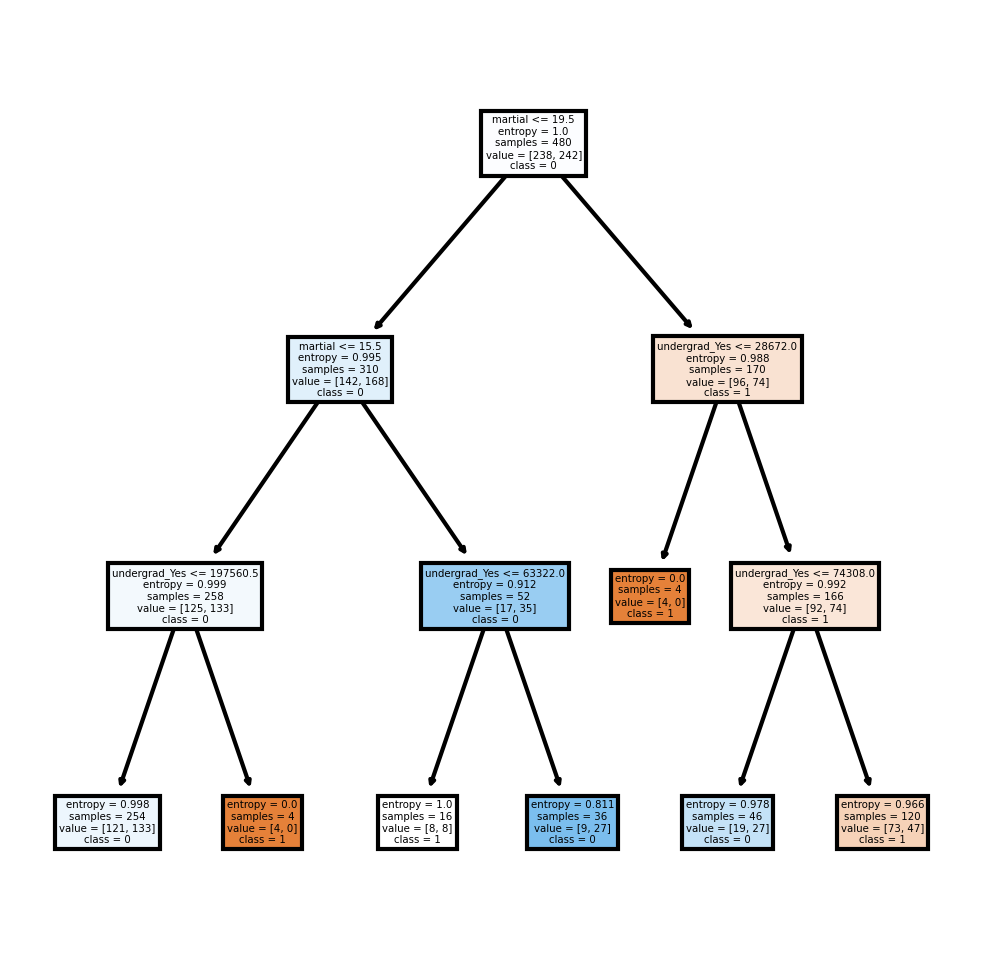

In [37]:
fn=['undergrad_Yes','martial','population','experience','urban_Yes','income']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [38]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    85
0    35
dtype: int64

In [39]:
preds

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=uint8)

In [40]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Urban_YES,,
0,19,41
1,16,44


In [41]:
# Accuracy 
np.mean(preds==y_test)

0.525

# Building Decision Tree Classifier (cart) using Gini Criteria

In [42]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [43]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.525

# Decision Tree Regression Example

In [45]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [47]:
array = Fraud.values
X = array[:,0:3]
y = array[:,3]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [49]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [50]:
#Find the accuracy
model.score(X_test,y_test)

-0.8239272388059704